## 라이브러리 불러오기

In [3]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import gc
from datetime import datetime, date

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')


# Load Data

In [5]:
# CSV to parquet
# 메모리에 효율적인 데이터 유형을 사용하여 용량을 크게 줄이고 빠른 작업이 가능하다.
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')
csv_to_parquet('../input/jejuload-set/train.csv', 'train')
csv_to_parquet('../input/jejuload-set/test.csv', 'test')

train Done.
test Done.


In [6]:
df_info_path = '../input/jejuload-set/data_info.csv'
train_path = './train.parquet'
test_path = './test.parquet'
# 날씨 추가한 데이터
weather_train_path ="../input/weather/train(weather).csv"
weather_test_path  = '../input/weather/test(weather_predict).csv'
# 불러오기
train = pd.read_parquet(train_path)
test = pd.read_parquet(test_path)
info = pd.read_csv(df_info_path)
# 날씨 데이터 
we_train = pd.read_csv(weather_train_path)
we_test = pd.read_csv(weather_test_path)

# 데이터 확인

In [40]:
# 정보 확인
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [41]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [42]:
train.shape

(4701217, 24)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   road_in_use            int64  
 5   lane_count             int64  
 6   road_rating            int64  
 7   road_name              object 
 8   multi_linked           int64  
 9   connect_code           int64  
 10  maximum_speed_limit    float64
 11  vehicle_restricted     float64
 12  weight_restricted      float64
 13  height_restricted      float64
 14  road_type              int64  
 15  start_node_name        object 
 16  start_latitude         float64
 17  start_longitude        float64
 18  start_turn_restricted  object 
 19  end_node_name          object 
 20  end_latitude           float64
 21  end_longitude          float64
 22  end_turn_restricte

In [44]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [45]:
train.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [46]:
test.shape

(291241, 23)

In [47]:
test.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,0,3,107,연삼로,0,0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,0,2,103,일반국도12호선,0,0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,0,1,103,일반국도16호선,0,0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,0,3,103,일반국도11호선,0,0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,0,3,106,번영로,0,0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


# EDA

### 데이터 중복값 확인

In [48]:
remainders = train.drop_duplicates().shape[0]
print(f"전체가 중복된 row 수 : {train.shape[0] - remainders}")

전체가 중복된 row 수 : 0


In [49]:
for col in list(train):  # list(데이터 프레임) 이렇게 하면 컬럼명을 출력한다. 
    remainders = train.drop_duplicates([col]).shape[0]  # col 에서 중복값이 있으면 드랍
    # 드랍한 데이터 프레임과 원래 데이터 프레임의 row길이를 비교한다. 
    if remainders != train.shape[0]:
        print(f"중복된 값이 있는 Column : {col}")
        print(f"중복 row 수 : {remainders}")
        print("-"*30)

중복된 값이 있는 Column : base_date
중복 row 수 : 281
------------------------------
중복된 값이 있는 Column : day_of_week
중복 row 수 : 7
------------------------------
중복된 값이 있는 Column : base_hour
중복 row 수 : 24
------------------------------
중복된 값이 있는 Column : road_in_use
중복 row 수 : 2
------------------------------
중복된 값이 있는 Column : lane_count
중복 row 수 : 3
------------------------------
중복된 값이 있는 Column : road_rating
중복 row 수 : 3
------------------------------
중복된 값이 있는 Column : road_name
중복 row 수 : 61
------------------------------
중복된 값이 있는 Column : multi_linked
중복 row 수 : 2
------------------------------
중복된 값이 있는 Column : connect_code
중복 row 수 : 2
------------------------------
중복된 값이 있는 Column : maximum_speed_limit
중복 row 수 : 6
------------------------------
중복된 값이 있는 Column : vehicle_restricted
중복 row 수 : 1
------------------------------
중복된 값이 있는 Column : weight_restricted
중복 row 수 : 4
------------------------------
중복된 값이 있는 Column : height_restricted
중복 row 수 : 1
------------------------------

### 상관계수 확인

In [50]:
train.corr()

,base_date,base_hour,road_in_use,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,-0.001800,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.001188,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
road_in_use,-0.001800,-0.001188,1.000000,0.008773,-0.033396,-0.000806,-0.001880,-0.003815,NaN,-0.014873,NaN,-0.018760,-0.027831,0.018197,-0.028571,0.018275,0.026095
lane_count,0.011463,-0.029194,0.008773,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.033396,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.000806,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.001880,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,-0.003815,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.014873,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092


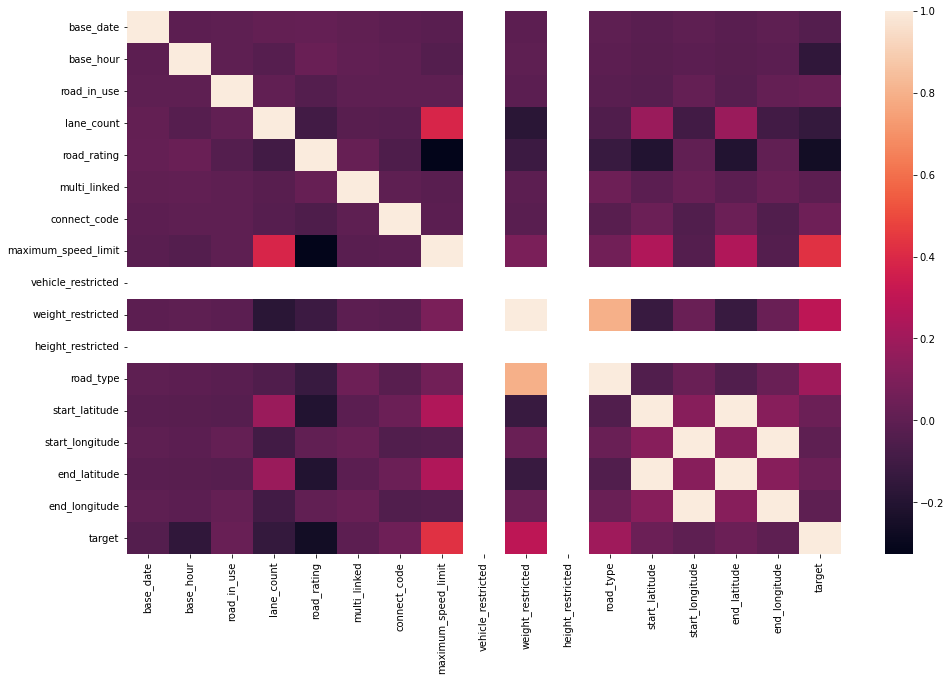

In [51]:
# 전체 상관계수 확인
plt.figure(figsize = (16,10))
sns.heatmap(train.corr())
plt.show()

__Target과 상관관계가 높은 피처__
1. road_rating : 도로등급
1. maximum_speed_limit : 최고 제한속도
1. weight_restricted : 통과제한차량
1. road_type : 도로유형

In [52]:
train["weight_restricted"].unique()

array([32400.,     0., 43200., 50000.])

### 날짜와 평균속도의 상관관계

In [53]:
# int 타입
train["base_date"]

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: int64

In [54]:
# 문자열로 변환
train["base_date"] = train["base_date"].astype(str)
test["base_date"] = test["base_date"].astype(str)

In [55]:
# 날짜를 변환해서 년원일분으로 나눠주는 함수
def split_date(df, col):
    date = pd.to_datetime(df[col])
    df[col] = date
    df["year"] = date.dt.year
    df["month"] = date.dt.month
    df["day"] = date.dt.day

# train, test 데이터 둘 다 변환
split_date(train, "base_date")
split_date(test, "base_date")

In [56]:
train[["base_date","year", "month", "day"]]

,base_date,year,month,day
0,2022-06-23,2022,6,23
1,2022-07-28,2022,7,28
2,2021-10-10,2021,10,10
3,2022-03-11,2022,3,11
4,2021-10-05,2021,10,5
...,...,...,...,...
4701212,2021-11-04,2021,11,4
4701213,2022-03-31,2022,3,31
4701214,2022-06-13,2022,6,13
4701215,2021-10-20,2021,10,20


In [57]:
test[["base_date","year", "month", "day"]]

,base_date,year,month,day
0,2022-08-25,2022,8,25
1,2022-08-09,2022,8,9
2,2022-08-05,2022,8,5
3,2022-08-18,2022,8,18
4,2022-08-10,2022,8,10
...,...,...,...,...
291236,2022-08-27,2022,8,27
291237,2022-08-19,2022,8,19
291238,2022-08-05,2022,8,5
291239,2022-08-12,2022,8,12


<AxesSubplot:xlabel='month', ylabel='target'>

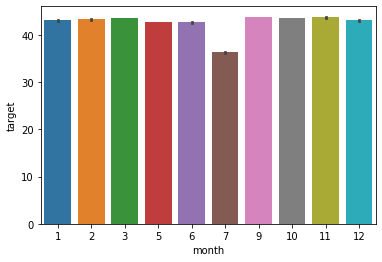

In [58]:
# 월별 평균 속도 시각화
sns.barplot(data = train, x = "month", y = "target")

<AxesSubplot:xlabel='year', ylabel='target'>

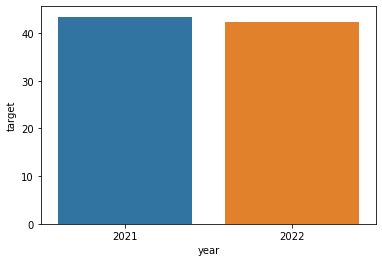

In [60]:
# 연도별 평균속도 변화 - 거의 무의미한 결과
sns.barplot(data = train, x = "year", y = "target")

<AxesSubplot:xlabel='base_date', ylabel='target'>

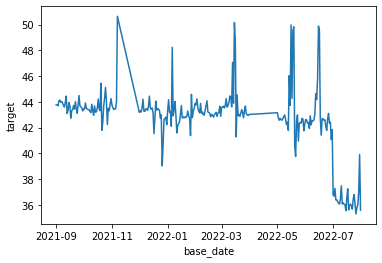

In [61]:
# 일별 평균속도
a = train.groupby(["base_date"])[["target"]].mean()
sns.lineplot(data = a, x = a.index, y = "target")

<AxesSubplot:xlabel='day', ylabel='target'>

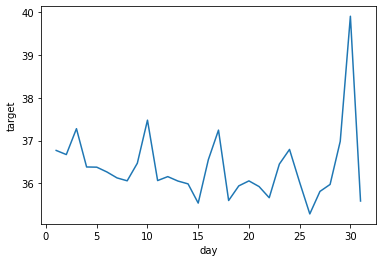

In [62]:
a = train[train["month"] == 7].groupby(["day"])[["target"]].mean()
sns.lineplot(data = a, x = a.index, y = "target")

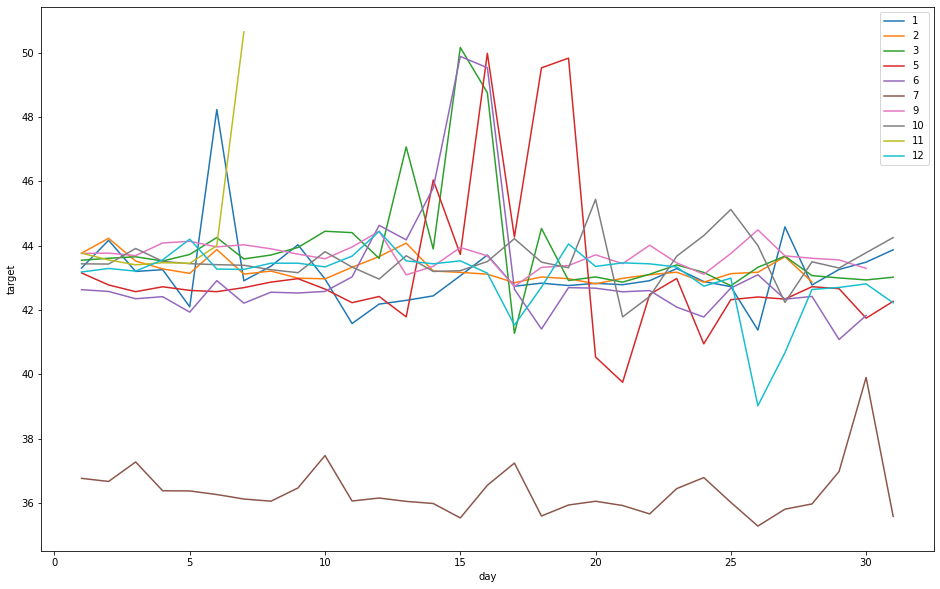

In [63]:
# 월별 일별 평균속도
plt.figure(figsize=(16,10))
for i in range(1,13):
    a = train[train["month"] == i].groupby(["day"])[["target"]].mean()
    sns.lineplot(data = a, x = a.index, y = "target", label = i)

plt.legend()
plt.show()

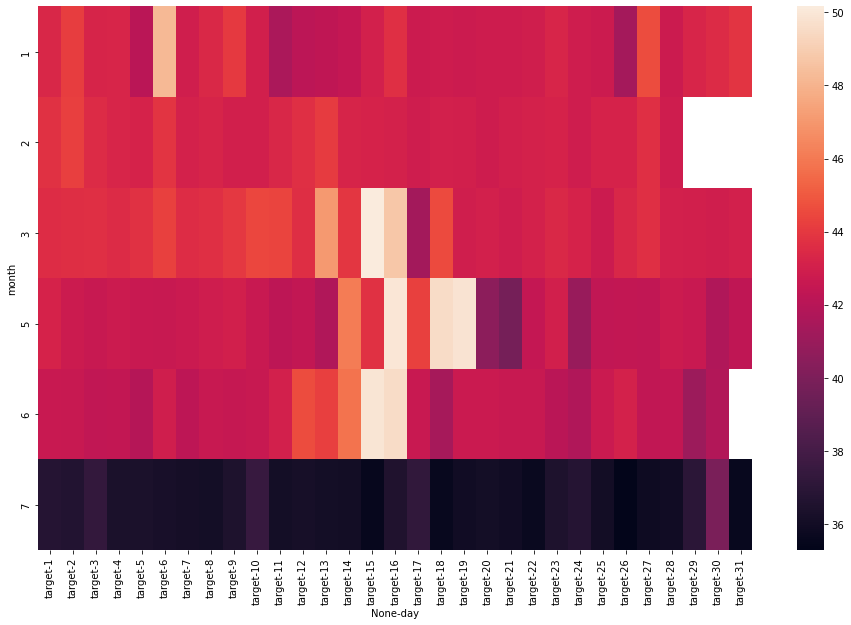

In [64]:
plt.figure(figsize=(16,10))
a = train[train["year"]==2022].groupby(["month", "day"])[["target"]].mean().unstack()
sns.heatmap(a)
plt.show()

### 요일과 평균속도의 관계

In [7]:
# 요일과 평균속도
train.groupby(["day_of_week"])[["target"]].mean()

,target
day_of_week,
금,42.450328
목,42.768345
수,42.770372
월,42.761365
일,43.179300
토,42.894117
화,42.699198


In [66]:
# 요일을 숫자로 변환
def weekday(d):
    return d.weekday()

# train test 둘다 요일 숫자로 변환
train["day_of_week"] = train["base_date"].apply(weekday)
test["day_of_week"] = test["base_date"].apply(weekday)

In [67]:
# 요일과 도착지점의 상관관계
temp = train.groupby(["end_node_name","day_of_week"])[["target"]].mean().unstack()
temp

target                                              \
day_of_week            0          1          2          3          4   
end_node_name                                                          
BYC            24.907368  24.868003  25.653425  24.567850  24.561404   
CU서귀호근로점       32.295455  31.016393  32.186047  31.849624  31.303571   
KAL사거리         26.355422  26.151551  26.366667  26.039766  25.646226   
가는질            52.749258  52.684466  52.489146  52.523148  52.767507   
가동             28.602683  28.803951  28.507952  28.573469  29.074126   
...                  ...        ...        ...        ...        ...   
회수사거리          39.660448  39.252475  39.122222  39.003704  39.231325   
회수입구           41.622381  41.514038  41.633278  41.542010  41.342306   
회천교차로          59.749415  59.510588  59.593750  60.011696  59.566210   
효례교            48.746163  48.952719  48.819235  49.168816  48.312357   
흘천5교           25.541814  25.260664  25.236659  25.704094  25.287671   

                                     
day_of_week            5          6  
end_node_name                        
BYC            24.575323  25.978022  
CU서귀호근로점       32.755102  34.000000  
KAL사거리         26.934602  27.311765  
가는질            53.148499  53.395570  
가동             28.294666  28.496518  
...                  ...        ...  
회수사거리          39.221542  39.545455  
회수입구           41.510595  41.685656  
회천교차로          59.547756  59.422503  
효례교            48.800000  48.898601  
흘천5교           25.277970  26.277011  

[487 rows x 7 columns]

In [68]:
# 날짜를 받아서 주말 평일을 판단하는 함수
# 평일이면 0 주말이면 1 반환
# 금,토,일을 주말로 본다
def is_weekend(d):
    if d.weekday() > 4:
        wd = 0
    else:
        wd = 1
    return wd

# 사실 요일별 차이가 없어서 무의미해보임
train["is_weekend"] = train["base_date"].apply(is_weekend)
test["is_weekend"] = test["base_date"].apply(is_weekend)

<AxesSubplot:xlabel='is_weekend', ylabel='target'>

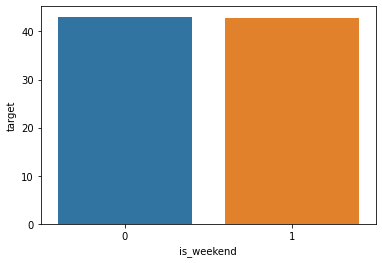

In [69]:
# 주말과 평일 시각화
a = train.groupby(["is_weekend"])[["target"]].mean()
sns.barplot(data = a, x = a.index, y = "target")

<AxesSubplot:xlabel='None-base_hour', ylabel='is_weekend'>

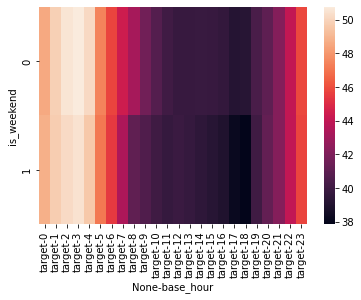

In [70]:
# 주말과 평일 시각화
a = train.groupby(["is_weekend","base_hour"])[["target"]].mean()
sns.heatmap(a.unstack())

### 시간과 평균속도의 관계

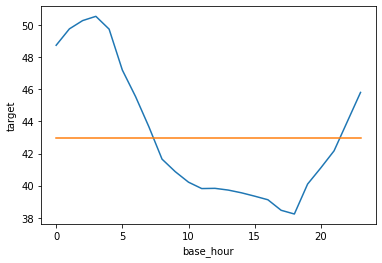

In [71]:
# 하루 중 가장 정체 되는 시간
# 빨간 선은 타겟의 중앙값
# 극단값이 많이 존재하는 데이터 이므로 평규보다는 중앙값이 더 좋은 지표로 보임
a = train.groupby(["base_hour"])[["target"]].mean()
sns.lineplot(data = a, x = a.index, y = "target")
sns.lineplot(data = a, x = a.index, y = train["target"].median())
plt.show()

In [72]:
# 평균 속도보다 느리게 달리는 시간대 
a[a["target"]<=train["target"].median()]

,target
base_hour,
8,41.656292
9,40.875939
10,40.222232
11,39.824593
12,39.838538
13,39.731471
14,39.561121
15,39.351700
16,39.127929


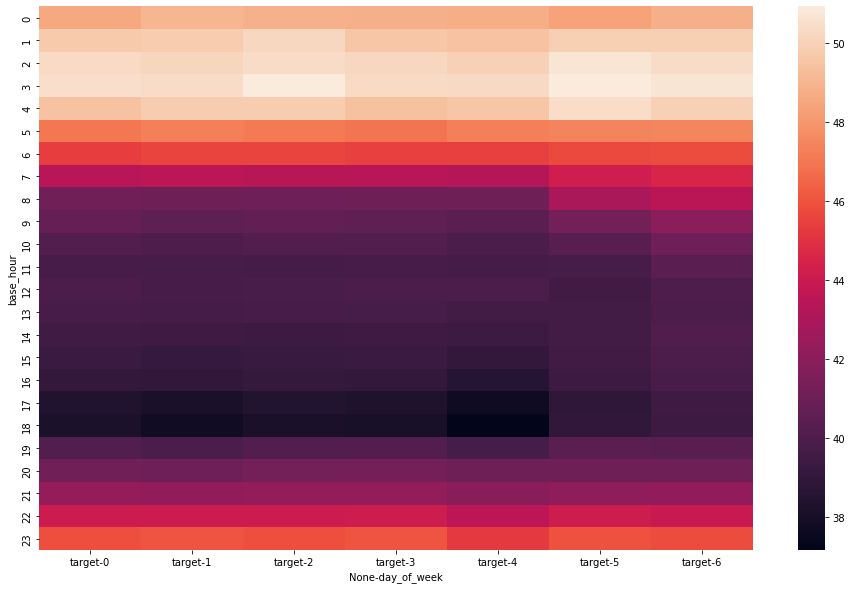

In [73]:
# 평균 속도에 대한 요일과 시간의 관계
a = train.groupby(["base_hour", "day_of_week"])[["target"]].mean()
a = a.unstack()

plt.figure(figsize=(16,10))
sns.heatmap(a)
plt.show()

- 전체 평균을 기준으로 봤을때 8시 부터 21시까지는 모두 정체 시간대로 볼 수 있다. 
- 하지만 이는 새벽시간대가 특히 교통량이 적어서 평균 속도가 왜곡 된것으로 볼 수 있다. 
- 그러므로 8~21시 구간의 평균을 기준으로 잡고 다시 확인해보자

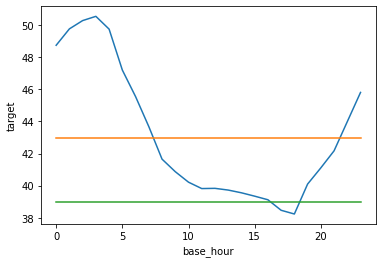

In [74]:
# 빨간 선은 모든 시간대의 평균속도의 중앙값
# 초록 선은 주요 주행시간 기준 평균 속도 중앙값
a = train.groupby(["base_hour"])[["target"]].mean()
sns.lineplot(data = a, x = a.index, y = "target")
sns.lineplot(data = a, x = a.index, y = train["target"].median())
sns.lineplot(data = a, x = a.index, y = train[(train["base_hour"]>=8) & (train["base_hour"]<=21)]["target"].median())
plt.show()

In [75]:
# 초록선 밑에 값
a[a["target"]<=train[(train["base_hour"]>=8) & (train["base_hour"]<=21)]["target"].median()]

,target
base_hour,
17,38.473363
18,38.241258


- 위 그래프로 볼때, 3개의 구간으로 라벨링 할 수 있을것으로 보임
- 0\~5시 까지는 3
- 6\~7/22\~23시 까지는 2
- 8\~17/17\~21시 까지는 1
- 17~18시는 0

In [76]:
# 시간 범주화
def time_category(x):
    if (0<=x<=5):
        y = 3
    if (6<=x<=7)or(22<=x<=23):
        y = 2
    if (8<=x<=16)or(19<=x<=21):
        y = 1
    if (17<=x<=18):
        y = 0    
    return y

train["time_category"] = train["base_hour"].apply(time_category)
test["time_category"] = test["base_hour"].apply(time_category)

### 출발지 도착지와 평균속도

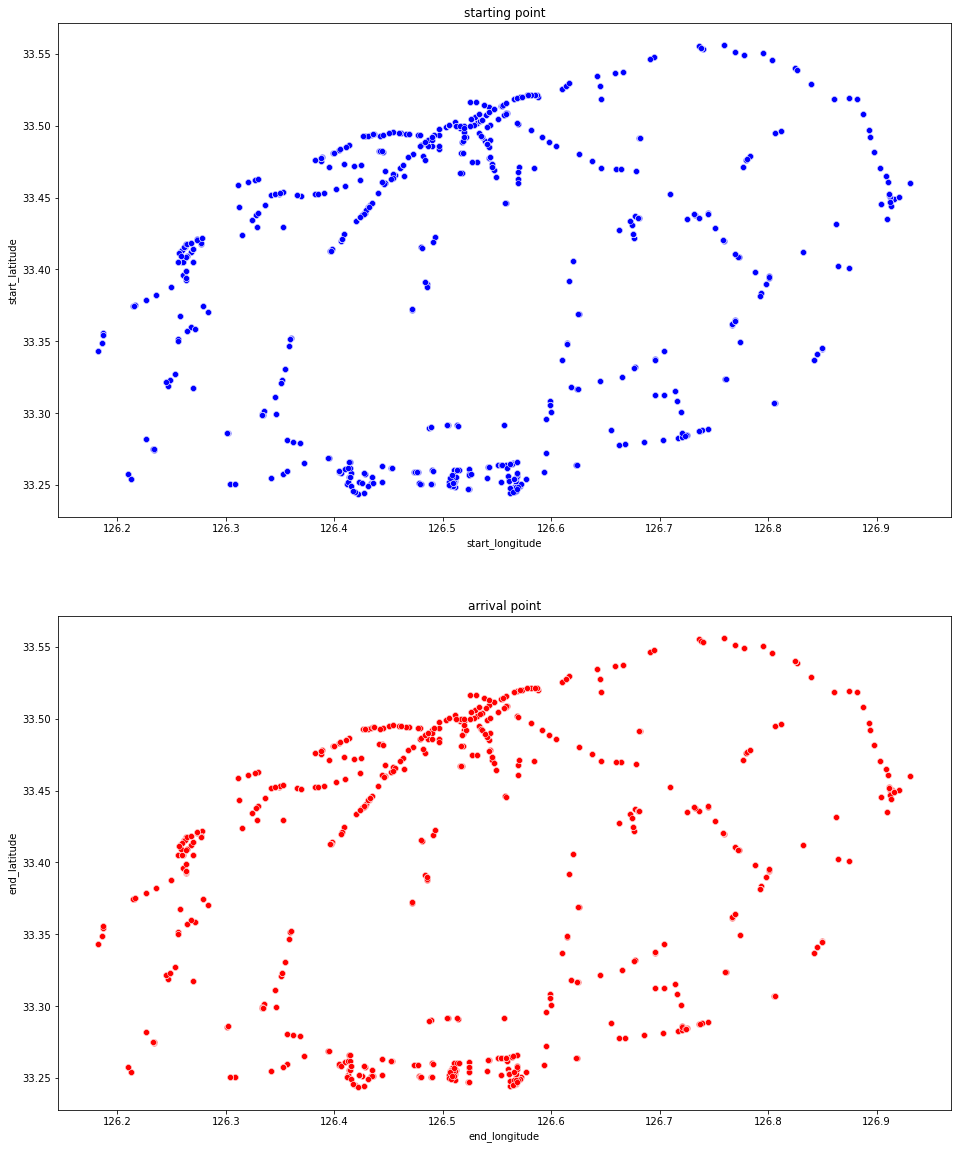

In [77]:
# 출발 
plt.figure(figsize = (16,20))
plt.subplot(211)
plt.title("starting point")
sns.scatterplot(data = train, y = "start_latitude", x = "start_longitude", color = "blue")

plt.subplot(212)
plt.title("arrival point")
sns.scatterplot(data = train, y = "end_latitude", x = "end_longitude", color = "red")

plt.show()

### 도로 등급 분석

In [78]:
# 도로 등급별 평균속도
# 원핫 인코딩 필요
train.groupby(["road_rating"])["target"].mean()

road_rating
103    46.388468
106    48.021548
107    34.701408
Name: target, dtype: float64

### 최고 제한 속도 분석

In [79]:
train["maximum_speed_limit"]

0          60.0
1          60.0
2          80.0
3          50.0
4          80.0
           ... 
4701212    50.0
4701213    80.0
4701214    60.0
4701215    80.0
4701216    60.0
Name: maximum_speed_limit, Length: 4701217, dtype: float64

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='Count'>

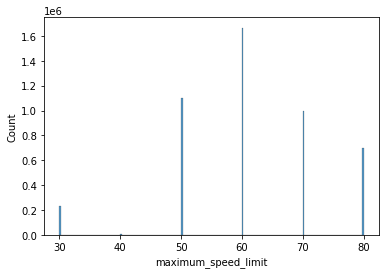

In [80]:
# 최고속도 분포
sns.histplot(data = train, x = "maximum_speed_limit")

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

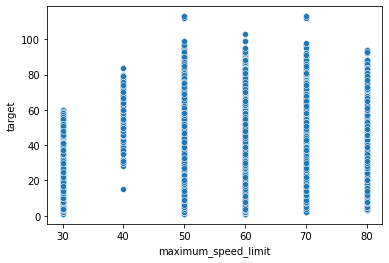

In [81]:
# 어느정도 상관 관계가 있음
# 50km/h 이상 구간에서는 거의 모든 속도를 다 볼 수 있지만 그 이하 구간에서는 최고 속력을 내는 경우가 없음
# 의외로 80km/h 도로에서 최고속도를 못내는 경우가 많음
sns.scatterplot(data = train, x= "maximum_speed_limit", y = "target")

### 통과제한 차량 분석

In [82]:
train["weight_restricted"].unique()

array([32400.,     0., 43200., 50000.])

<AxesSubplot:xlabel='weight_restricted', ylabel='target'>

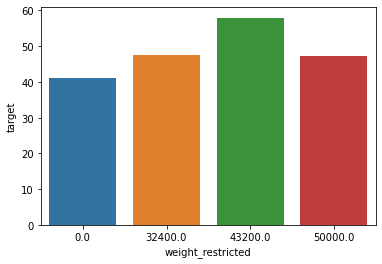

In [83]:
# 통과제한 차량별 평균 속도
a = train.groupby(["weight_restricted"])[["target"]].mean()
sns.barplot(data = a, x = a.index, y="target")

# 원핫인코딩 필요

### 차로수 분석

In [84]:
train.groupby(["lane_count"])["target"].mean()

lane_count
1    43.570562
2    44.915713
3    34.917783
Name: target, dtype: float64

### 도로 유형 분석

In [85]:
train["road_type"]

0          3
1          0
2          0
3          0
4          0
          ..
4701212    0
4701213    3
4701214    0
4701215    0
4701216    0
Name: road_type, Length: 4701217, dtype: int64

<AxesSubplot:xlabel='road_type', ylabel='target'>

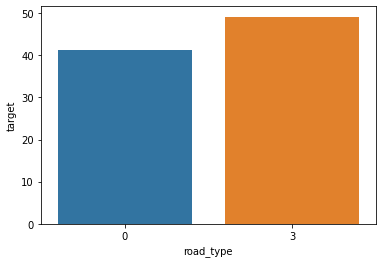

In [86]:
# 도로 유형별 통계
# 원핫 인코딩 필요
a = train.groupby(["road_type"])[["target"]].mean()
sns.barplot(data = a, x = a.index, y = "target")

### 주행거리

In [87]:
# haversine을 이용해 거리 구하기
!pip install haversine

In [88]:
from haversine import haversine, Unit
train_distance = []
df_dist = train[['start_latitude','start_longitude','end_latitude','end_longitude']]
for i in range(df_dist.shape[0]):
    hb = (df_dist['start_latitude'][i], df_dist['start_longitude'][i])
    hc = (df_dist['end_latitude'][i], df_dist['end_longitude'][i])
    result = haversine(hb,hc,unit='m')
    train_distance.append(result)
df_dist = pd.DataFrame(data = train_distance)

test_distance = []
df_dist_test = test[['start_latitude','start_longitude','end_latitude','end_longitude']]
for i in range(df_dist_test.shape[0]):
    hb = (df_dist_test['start_latitude'][i], df_dist_test['start_longitude'][i])
    hc = (df_dist_test['end_latitude'][i], df_dist_test['end_longitude'][i])
    result = haversine(hb,hc,unit='m')
    test_distance.append(result)
df_dist_test = pd.DataFrame(data = test_distance)

df_dist.rename(columns = {0 : 'distance'}, inplace = True)
df_dist_test.rename(columns = {0 : 'distance'}, inplace = True)

df_dist = pd.read_csv('../input/dist-data/df_dist.csv')
df_dist_test = pd.read_csv('../input/dist-data/df_dist_test.csv')

train=pd.concat([train,df_dist], axis = 1)
test=pd.concat([test,df_dist_test], axis = 1)

<AxesSubplot:xlabel='distance', ylabel='Density'>

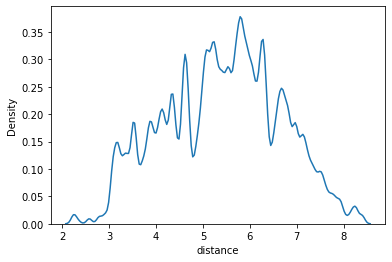

In [89]:
# 거리 정규화
train["distance"] = np.log1p(train["distance"])
# 분포 확인
sns.kdeplot(train["distance"])

<AxesSubplot:xlabel='distance', ylabel='Density'>

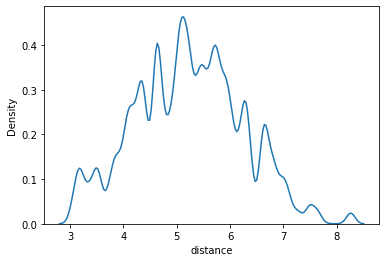

In [90]:
# 거리 정규화 
test["distance"] = np.log1p(test["distance"])
# 분포 확인
sns.kdeplot(test["distance"])

# 기상청 날씨 데이터 확인

In [103]:
# 위치 데이터
we_train["stnNm"]

0          3
1          3
2          3
3          3
4          3
          ..
4701212    2
4701213    2
4701214    2
4701215    2
4701216    2
Name: stnNm, Length: 4701217, dtype: int64

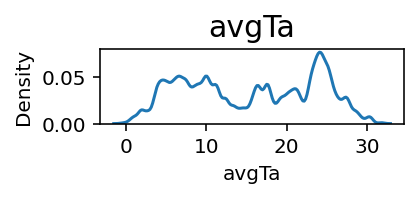

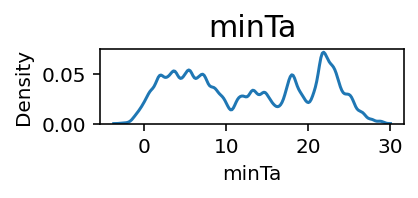

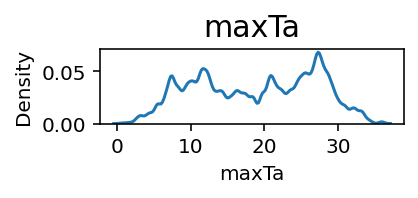

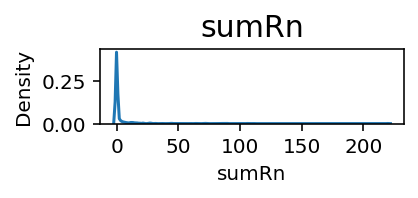

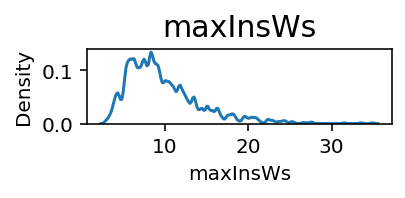

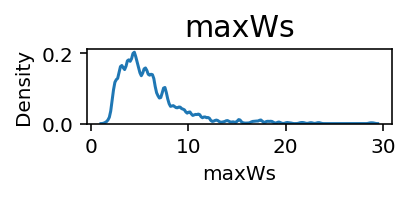

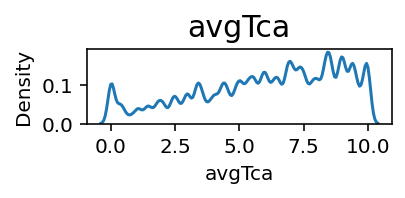

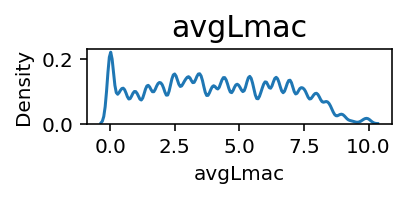

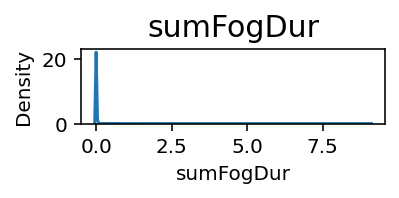

In [104]:
# 기상데이터 분포 점검
columns = ["avgTa", "minTa", "maxTa", "sumRn", "maxInsWs", "maxWs", "avgTca", "avgLmac", "sumFogDur"]
# plt.figure(figsize = (20,60))
for i, col in enumerate(columns):
    plt.subplot(len(columns)//2+1, 2, i+1)
    sns.kdeplot(data = we_train, x = col)
    plt.title(col, fontsize =15)
    plt.show()